# <font color='Blue'>Machine Learning - Ensemble Methods - Classification - Case Study</font>

All models discussed so fare predict the value of the outcome variable based on a single model. Ensemble methods, on the 
other hand, are learning algorithms that take a set of estimators or classifiers (models) and classify new data points using
strategy such as majority vote. The majority voting could be based on couning simply the vote for each class or could be 
weighted based on their individual accuracy measures. Ensemble methods can also be used for regression, where the prediction     of new data is simple average or weighted average of all the predictions from the set of regression models.There are two 
types of ensemble methods
  
### <font color='Blue'>Bagging</font>

Bagging is a colloquial term for bootstrap aggregation. Bootstrap aggregation is a method that allows us to decrease the 
variance of an estimate by averaging multiple estimates that are measured from random subsamples of a population. It may  
also involve feature bagging. 
  
### <font color='Blue'>Boosting</font>

In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised 
learning, and a family of machine learning algorithms that convert weak learners to strong ones. Boosting is based on the 
question posed by Kearns and Valiant (1988, 1989): "Can a set of weak learners create a single strong learner?" A weak 
learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples 
better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the 
true classification. 

### <font color='Blue'>Random Forest</font>
Random forest is one of the most popular ensemble techniques used in the industry due to its performance and scalability. A 
random forest is an ensemble of decision trees, where each tree is built from a bootstrapped sample and randomly selected set 
of features (feature bagging). The hyperparameters in a Random forest are
  
  1. Number of decision trees
  2. Number of records and features to be sampled
  3. Depth and search criteria# 

We implement the following Ensemble techniques in this code
  
      Random Forest
      Adaptive Boosting
      Gradient Boosting
      Stochastic Gradient Boosting

## <font color='Blue'>Importing Libraries</font>

In [46]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

from sklearn.model_selection import train_test_split

## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

## <font color='Blue'>ROC Function</font>

In [47]:
# RoC Curve

# RoC Curve can be used to understand the overall performance of a logistic regression model and used for model selection
# RoC Curve is a plot between False positive rate [FP / (TN + FP)] and True positive rate [TP / (TP+FN)]
# Higher the AUC, better the model
# AUC < 0.5 model is inferior to a case of having no model
# AUC > 0.7 model is useful

def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
    probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

#fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)
#auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )

# <font color='Blue'>Micro-Mortgage Analysis</font>

Business wants to manage its 

    (a) risk in micro-mortgage loans
    (b) to lower the cost of micro-mortgage loans
    (c) adopt differential pricing for loans
  
In order to achieve its objectives, business needs to accurately predict whether a prospective borrower should be given a loan or not. Business has historical data which it can use for this purpose. The data contains the demographic, economic and social characteristics of borrowers along with loan repayment status (repaid or defaulted). Using SVM, we can build models that use the characteristics of prospective borrowers and obtain the probability of they repaying the loan.


## <font color='Blue'>Micro-Mortgage Data</font>

### <font color='Blue'>1.0 Data Preparation</font>

In [48]:
credit_df = pd.read_excel( "cleaned.xlsx",sheet_name='cleaned')
credit_df.info()

# Dataset contains 2223 records and 48 columns
# There are few categorical columns which are inferred as objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2223 non-null   object 
 1   Decision         2223 non-null   int64  
 2   Selfcon_Code     2223 non-null   int64  
 3   Tier_1           2223 non-null   int64  
 4   Tier_2           2223 non-null   int64  
 5   AccoClass        2223 non-null   int64  
 6   LoanType         2223 non-null   int64  
 7   Gender           2223 non-null   int64  
 8   Etype            2223 non-null   int64  
 9   Doc_prf          2223 non-null   int64  
 10  Marstat          2223 non-null   int64  
 11  Emp_Type_1       2223 non-null   int64  
 12  Emp_Type_2       2223 non-null   int64  
 13  Emp_Type_3       2223 non-null   int64  
 14  Educlass_1       2223 non-null   int64  
 15  Educlass_2       2223 non-null   int64  
 16  Oriclass_1       2223 non-null   int64  
 17  Oriclass_2    

### <font color='Blue'>1.1 Data Preparation - Categorical Variables</font>

In [49]:
credit_df.iloc[0:5,0:14]

,ID,Decision,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_prf,Marstat,Emp_Type_1,Emp_Type_2,Emp_Type_3
0,AJM-39R8-519413,0,1,0,0,0,1,0,1,0,1,1,0,0
1,AJM-3A3Z-876970,0,1,0,0,0,1,0,0,1,1,0,0,0
2,AJM-7427-952085,1,1,0,0,0,0,0,1,1,1,0,0,0
3,AJM-8ZTZ-979040,1,1,0,0,1,1,0,1,1,1,1,0,0
4,AJM-9SP2-614810,1,1,0,0,0,1,0,1,1,1,1,0,0


### <font color='Blue'>1.2 Class Distribution</font>

In [50]:
# Decision variable stands for "Sanction" or "Reject"
credit_df.Decision.value_counts()
# Decision = 1 - Sanction
# Decision = 0 - Reject

1    1792
0     431
Name: Decision, dtype: int64

### <font color='Blue'>1.3 Feature Extraction</font>

In [51]:
# Get the list of independent variables which would be used for classification
X_features = list( credit_df.columns )
len(X_features)

# Some values can be removed as they are either not required or captured in another variable
unwanted = ['ID','Decision','Expen','TotInc','DispInc','OldEmi','OldEmi_d', 'OldEmi_s','BankSave_d','LoanReq','MarVal','BankSave','Dwnpay',
            'CalcEmi','IIR','IAR','FOIR','dwnp_prop']
X_features = [ele for ele in X_features if ele not in unwanted] 
len(X_features)


31

In [52]:
# Building Outcome and feature set
Y = credit_df.Decision
X = credit_df[X_features]

### <font color='Blue'>1.4 Split into Train and Test Data</font>

In [53]:
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size = 0.3,random_state = 42)

### <font color='Blue'>2.0 Random Forest</font>

Random forest is one of the most popular ensemble techniques used in the industry due to its performance and scalability. A 
random forest is an ensemble of decision trees, where each tree is built from a bootstrapped sample and randomly selected set 
of features (feature bagging). The hyperparameters in a Random forest are
  
  1. Number of decision trees
  2. Number of records and features to be sampled
  3. Depth and search criteria

### <font color='Blue'>2.1 Building the Random Forest Model</font>

In [54]:
radm_clf = RandomForestClassifier( max_depth=10, n_estimators=100)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=10)

### <font color='Blue'>2.2 Extracting Probabilities</font>

In [55]:
rf_predict = radm_clf.predict_proba( test_X )
rf_predict = pd.DataFrame(rf_predict)[1]
rf_predict = rf_predict.to_numpy()

In [56]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": test_y, 
                            "predicted_prob": rf_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
96,1,0.927494
1401,1,0.975356
1994,1,0.895214
1987,1,0.959235
859,0,0.764036
707,1,0.819570
1263,1,0.878762
290,1,0.838913
1978,1,0.886427
1760,1,0.671049


### <font color='Blue'>2.3 Classifier Performance</font>

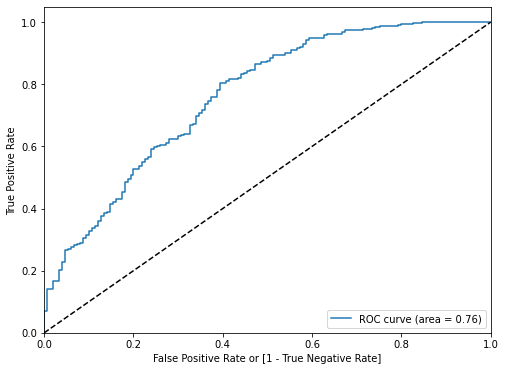

0.7615731785944553

In [57]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( test_y, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( test_y, y_pred_df.predicted_prob)

### <font color='Blue'>2.4  Plotting Distributions and Identifying the optimum Probability</font>

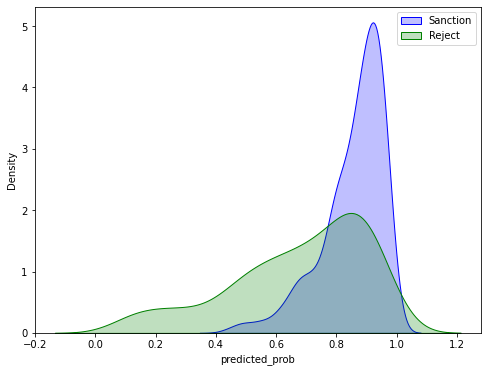

In [58]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>2.5 Confusion Matrix and Performance</font>

In [59]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.7 else 0)
pd.crosstab(test_y, y_pred_df.pred_y,margins=True,colnames=['predicted'],rownames=['actual'],margins_name="Total")

predicted,0,1,Total
actual,,,
0,68,82,150
1,51,466,517
Total,119,548,667


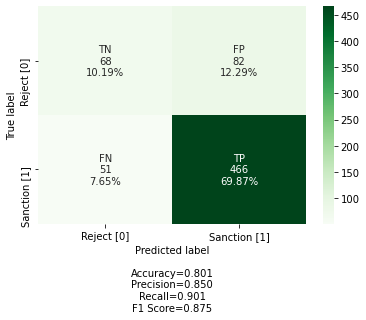

In [60]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(test_y, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["Reject [0]","Sanction [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

### <font color='Blue'>2.6 Finding Important Features</font>

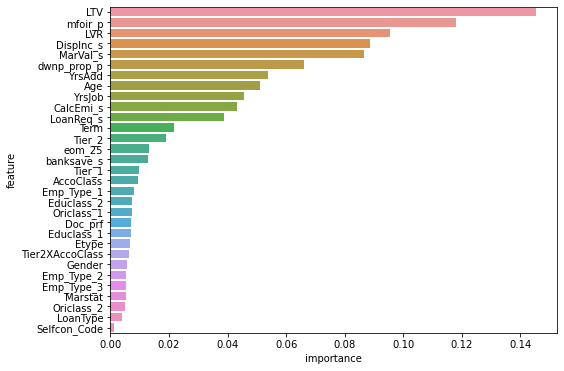

In [61]:
# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': radm_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))

# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

### <font color='Blue'>3.0 Boosting</font>

Boosting is another popular ensemble technique which combines multiple weak classifiers into a single strong classifier. A weak classifier is one which is slightly better than random guessing. Any classification algoritm can be used for boosting and it is called base classifier. Boosting builds classifiers in a sequential manner as opposed as bagging, which can build classifiers in parallel. Boosting builds classifier by giving equal weights to each sample and then focuses on correctly classifying misclassified examples in subsequent classifiers. Two most widely used boosting algorithms are AdaBoost and Gradient Boosting.

### <font color='Blue'>3.1 AdaBoost</font>

Adaboost assigns weight to each records in a training set, which determines the probability that a specific records is selected for training a classifier. For the first classifier, the weights af all examples will be equal (random sampling), but after training the first classifier, Adaboost increases the weight for the misclassified records so that these records will have a higher probability of selection in the training set in anticipation that the next classifier will learn to classify them correctly.

### <font color='Blue'>3.2 Model Building AdaBoost</font>

In [62]:
## Importing Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

## Importing Logistic regression
from sklearn.linear_model import LogisticRegression

## Initializing logistic regression to use as base classifier
logreg_clf = LogisticRegression()

## Initilizing adaboost classifier with 50 classifers
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50)

## Fitting adaboost model to training set
ada_clf.fit(train_X, train_y )

AdaBoostClassifier(base_estimator=LogisticRegression())

### <font color='Blue'>3.3 Extracting Probabilities</font>

In [63]:
ada_predict = ada_clf.predict_proba( test_X )
ada_predict = pd.DataFrame(ada_predict)[1]
ada_predict = ada_predict.to_numpy()

In [64]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": test_y, 
                            "predicted_prob": ada_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
96,1,0.515953
1401,1,0.518937
1994,1,0.514259
1987,1,0.514806
859,0,0.503812
707,1,0.512595
1263,1,0.523587
290,1,0.506887
1978,1,0.508230
1760,1,0.510910


### <font color='Blue'>3.4 Classifier Performance</font>

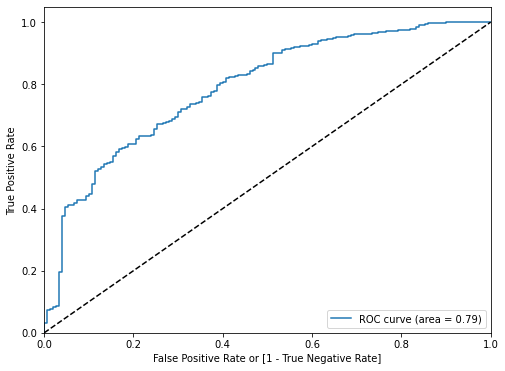

0.7893488072211476

In [65]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( test_y, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( test_y, y_pred_df.predicted_prob)

### <font color='Blue'>3.5 Plotting Distributions and Identifying the optimum Probability</font>

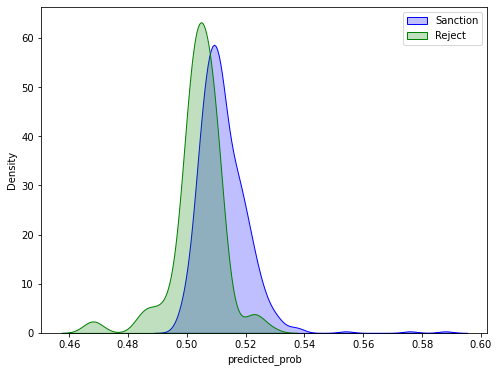

In [66]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
plt.legend()
plt.show()

### <font color='Blue'>3.6 Confusion Matrix and Performance Measures</font>

In [67]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.51 else 0)

In [68]:
pd.crosstab(test_y, y_pred_df.pred_y,margins=True,colnames=['predicted'],rownames=['actual'],margins_name="Total")

predicted,0,1,Total
actual,,,
0,127,23,150
1,223,294,517
Total,350,317,667


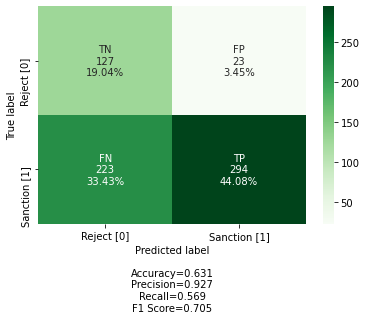

In [69]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(test_y, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["Reject [0]","Sanction [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [70]:
print( metrics.classification_report( test_y, y_pred_df.pred_y ) )

              precision    recall  f1-score   support

           0       0.36      0.85      0.51       150
           1       0.93      0.57      0.71       517

    accuracy                           0.63       667
   macro avg       0.65      0.71      0.61       667
weighted avg       0.80      0.63      0.66       667



### <font color='Blue'>4.0 Gradient Boosting</font>

AdaBoost (seen previously) focusses on the misclassified examples in the subsequent classifiers, whereas gradient boosting focusses on residuals from previous classifers and fits a models to the residuals. Gradient boosting algorithm repetitively leverages the patterns in the residuesls and strengthens the model with weak predictions and makes in better. Gradient boosting uses a deicison tree as a base classifier.

### <font color='Blue'>4.1 Executing Gradient Boosting</font>

In [71]:
## Importing Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

## Initializing Gradient Boosting with 500 estimators and max depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)

## Fitting gradient boosting model to training set
gboost_clf.fit(train_X, train_y )

GradientBoostingClassifier(max_depth=10, n_estimators=500)

### <font color='Blue'>4.2 Extracting Probabilities</font>

In [72]:
gra_predict = gboost_clf.predict_proba( test_X )
gra_predict = pd.DataFrame(gra_predict)[1]
gra_predict = gra_predict.to_numpy()

In [73]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": test_y, 
                            "predicted_prob": gra_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
96,1,1.000000
1401,1,1.000000
1994,1,1.000000
1987,1,1.000000
859,0,0.005059
707,1,1.000000
1263,1,1.000000
290,1,0.987592
1978,1,1.000000
1760,1,0.207410


### <font color='Blue'>4.3 Classifier Performance</font>

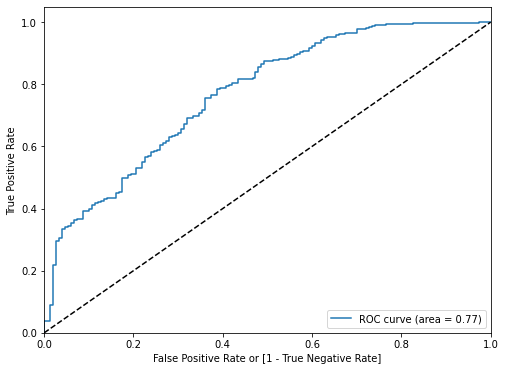

0.7681108961960026

In [74]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( test_y, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( test_y, y_pred_df.predicted_prob)

### <font color='Blue'>4.4 Plotting Distributions and Identifying the optimum Probability</font>

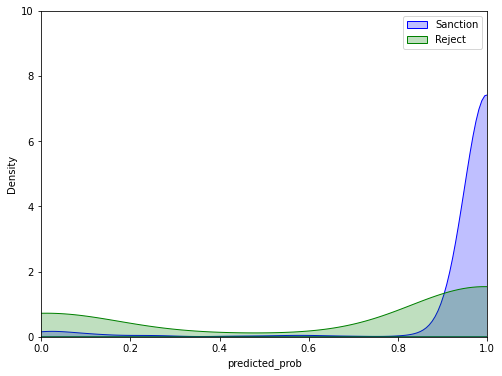

In [75]:
plt.figure( figsize = (8,6) )
g=sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
g=sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
g = (g.set(xlim=(0,1),ylim=(0,10)))
plt.legend()
plt.show()

### <font color='Blue'>4.5 Confusion Matrix and Performance Measures</font>

In [76]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.85 else 0)

In [77]:
pd.crosstab(test_y, y_pred_df.pred_y,margins=True,colnames=['predicted'],rownames=['actual'],margins_name="Total")

predicted,0,1,Total
actual,,,
0,55,95,150
1,25,492,517
Total,80,587,667


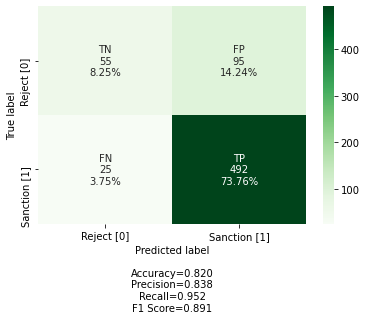

In [78]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(test_y, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["Reject [0]","Sanction [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [79]:
print( metrics.classification_report( test_y, y_pred_df.pred_y ) )

              precision    recall  f1-score   support

           0       0.69      0.37      0.48       150
           1       0.84      0.95      0.89       517

    accuracy                           0.82       667
   macro avg       0.76      0.66      0.68       667
weighted avg       0.80      0.82      0.80       667



### <font color='Blue'>4.6 Indentifying Important Features</font>

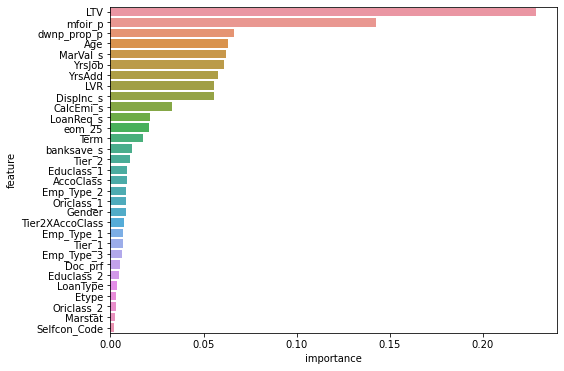

In [80]:
import numpy as np

# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': gboost_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))

# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

### <font color='Blue'>5.0 Stochastic Gradient Boosting</font>

    Useful when there is overfitting in gradient boosting
    Here a sub-sample is used in every iteration

### <font color='Blue'>5.1 Executing Stochastic Gradient Boosting</font>

In [81]:
# SGradient Boosting
## Importing Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

## Initializing Gradient Boosting with 500 estimators and max depth as 10, subsample < 1.0
## Sub-sample < 1.0 indicates stochastic gradient boosting
sboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10, subsample = 0.5)

## Fitting gradient boosting model to training set
sboost_clf.fit(train_X, train_y )

GradientBoostingClassifier(max_depth=10, n_estimators=500, subsample=0.5)

### <font color='Blue'>5.2 Extracting Probabilities</font>

In [82]:
sto_predict = sboost_clf.predict_proba( test_X )
sto_predict = pd.DataFrame(sto_predict)[1]
sto_predict = sto_predict.to_numpy()

In [83]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": test_y, 
                            "predicted_prob": sto_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
96,1,1.000000
1401,1,1.000000
1994,1,1.000000
1987,1,1.000000
859,0,0.996192
707,1,1.000000
1263,1,1.000000
290,1,0.999129
1978,1,0.999999
1760,1,0.501714


### <font color='Blue'>5.3 Classifier Performance</font>

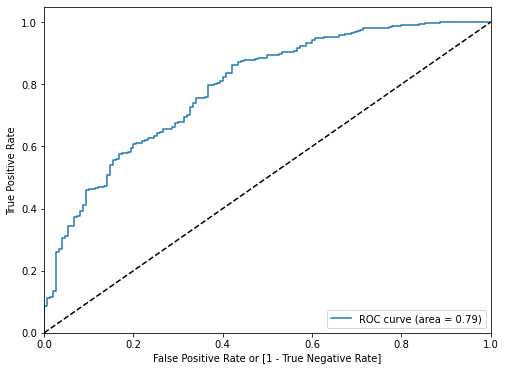

0.7906640876853643

In [84]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( test_y, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( test_y, y_pred_df.predicted_prob)

### <font color='Blue'>5.4 Plotting Distributions and Identifying the optimum Probability</font>

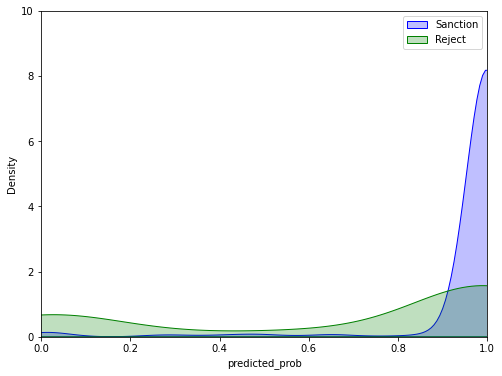

In [85]:
# Identifying the right probability
plt.figure( figsize = (8,6) )
g=sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Sanction' )
g=sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Reject' )
g = (g.set(xlim=(0,1),ylim=(0,10)))
plt.legend()
plt.show()

### <font color='Blue'>5.5 Confusion Matrix and Performance Measures</font>

In [86]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.9 else 0)

In [87]:
pd.crosstab(test_y, y_pred_df.pred_y,margins=True,colnames=['predicted'],rownames=['actual'],margins_name="Total")

predicted,0,1,Total
actual,,,
0,59,91,150
1,30,487,517
Total,89,578,667


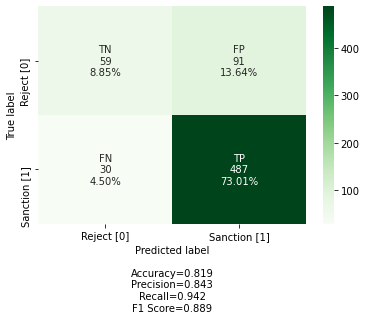

In [88]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(test_y, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["Reject [0]","Sanction [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [89]:
print( metrics.classification_report( test_y, y_pred_df.pred_y ) )

              precision    recall  f1-score   support

           0       0.66      0.39      0.49       150
           1       0.84      0.94      0.89       517

    accuracy                           0.82       667
   macro avg       0.75      0.67      0.69       667
weighted avg       0.80      0.82      0.80       667



### <font color='Blue'>5.6 Indentifying Important Features</font>

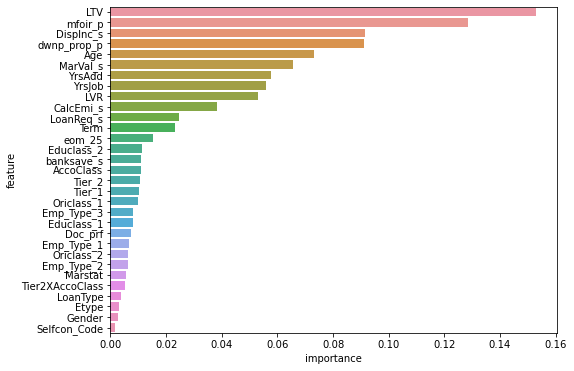

In [90]:
import numpy as np

# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': sboost_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))

# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

### <font color='Blue'>5.7 Results Comparison</font>

### Single Classifiers
    Logistic Regression              - AUC  0.770 
    Decision Tree                    - AUC  0.717 
    Naive-Bayes                      - AUC  0.719
       
### Ensembles 
    Bagging                          
       Random Forest                 - AUC  0.761
    Boosting
       Adaptive Boosting             - AUC  0.789
       Gradient Boosting             - AUC  0.768
       Stochastic Gradient Boosting  - AUC  0.790